In [36]:
# import libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [37]:
# import dataset (Digit recognizer dataset)

data = pd.read_csv("D:\\dataset\\Digit_reco\\train.csv")
data.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [38]:
# Shape of the dataset (like Rows and Columns)
data.shape

(42000, 785)

In [69]:
# select a sample data from dataset to show the image of digit
data.sample()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
517      8       0       0       0       0       0       0       0       0   

     pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
517       0  ...         0         0         0         0         0         0   

     pixel780  pixel781  pixel782  pixel783  
517         0         0         0         0  

[1 rows x 785 columns]

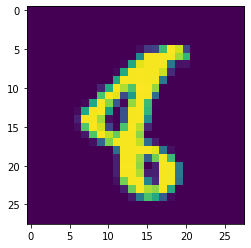

In [70]:
plt.imshow(data.iloc[517,1:].values.reshape(28,28))
# Here imshow means "image show"

In [41]:
x = data.iloc[:,1:]
y = data.iloc[:,0]

In [42]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [43]:
x_train.shape

(33600, 784)

### Model Building 

In [44]:
#using KNN
knn = KNeighborsClassifier()

In [45]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [46]:
y_predict = knn.predict(x_test)

In [47]:
accuracy_score(y_test,y_predict)

0.9648809523809524

In [48]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [49]:
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

In [50]:
# Apply the PCA model to reduce the dimension of data
from sklearn.decomposition import PCA
pca = PCA(n_components=100)

In [51]:
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [52]:
x_train_trf.shape

(33600, 100)

In [53]:
# Again using KNN after reducing the dimension of data
knn = KNeighborsClassifier()

In [54]:
knn.fit(x_train_trf,y_train)

KNeighborsClassifier()

In [55]:
y_pred = knn.predict(x_test_trf)

In [56]:
accuracy_score(y_test,y_pred)

0.9551190476190476

In [57]:
#for i in range(1, 785):
#    pca = PCA(n_components = i)
#   x_train_trf = pca.fit_transform(x_train)
#    x_test_trf = pca.transform(x_test)
#    knn = KNeighborsClassifier()
#    knn.fit(x_train_trf,y_train)
#    y_pred = knn.predict(x_test_trf)
#    print(accuracy_score(y_test,y_pred))

In [58]:
# transforming to a 2D coordinate system
pca = PCA(n_components = 2)
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)
x_train_trf

array([[-2.7186292 , -0.4896406 ],
       [-0.67695688, -6.75366354],
       [-3.03323535,  6.50916348],
       ...,
       [ 2.14884666,  0.78106216],
       [ 1.05956074,  0.94796395],
       [17.70257977,  1.96185767]])

In [59]:
# 2D scatter plot of 784 dimensional data
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x=x_train_trf[:,0],
                y=x_train_trf[:,1],
                color = y_train_trf,
                color_discrete_sequence=px.colors.qualitative.G10
                )
fig.show()

In [60]:
# transforming to a 3D coordinate system
pca = PCA(n_components = 3)
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)
x_train_trf

array([[-2.7185823 , -0.49000908,  1.13596604],
       [-0.67708794, -6.7533759 , -2.33694493],
       [-3.03327463,  6.50988133,  7.49129232],
       ...,
       [ 2.14876166,  0.78083035, -0.74777432],
       [ 1.05967851,  0.94740005,  3.95087644],
       [17.70263308,  1.96174727, -4.94299094]])

In [61]:
# 3D scatter plot of 784 dimensional data
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(data , x=x_train_trf[:,0], y=x_train_trf[:,1],z=x_train_trf[:,2],color = y_train_trf)
fig.update_layout(margin=dict(l=20, r=20, t=20, b=20))
fig.show()

In [62]:
# Eigen values
pca.explained_variance_

array([40.67111197, 29.17023399, 26.74459589])

In [63]:
# Eigen vectors
pca.components_.shape

(3, 784)

In [64]:
pca.explained_variance_ratio_

array([0.05785192, 0.0414927 , 0.03804239])

In [65]:
# transforming to a N-D coordinate system
pca = PCA(n_components = None)
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [66]:
pca.explained_variance_ratio_

array([5.78519225e-02, 4.14926968e-02, 3.80423901e-02, 2.96626277e-02,
       2.58156168e-02, 2.25498018e-02, 1.97306802e-02, 1.77527998e-02,
       1.56865066e-02, 1.43606328e-02, 1.37025484e-02, 1.22725500e-02,
       1.14691200e-02, 1.12302739e-02, 1.05852885e-02, 1.01993106e-02,
       9.57676152e-03, 9.42708817e-03, 9.12489429e-03, 8.90170190e-03,
       8.39940495e-03, 8.20063196e-03, 7.85303229e-03, 7.56739707e-03,
       7.37261022e-03, 7.01884653e-03, 6.97919728e-03, 6.71104483e-03,
       6.39845030e-03, 6.30337291e-03, 6.15350848e-03, 6.02388659e-03,
       5.83673972e-03, 5.78547759e-03, 5.72333148e-03, 5.46399774e-03,
       5.43207369e-03, 5.28172755e-03, 5.13381744e-03, 4.94015474e-03,
       4.87671103e-03, 4.81978768e-03, 4.68204430e-03, 4.59342487e-03,
       4.57660834e-03, 4.49219022e-03, 4.44682221e-03, 4.41540749e-03,
       4.35111936e-03, 4.32032928e-03, 4.21808870e-03, 4.18243127e-03,
       4.07994349e-03, 4.02004913e-03, 3.98335855e-03, 3.94598812e-03,
      

In [67]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

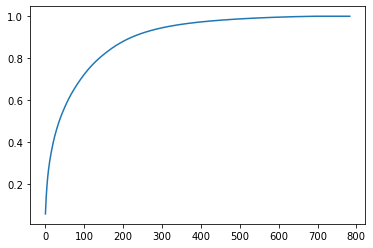

In [68]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))